### Setup

In [1]:
%pip install matplotlib
%pip install seaborn
%pip install ipympl
%pip install jupyter
%pip install scipy
%pip install pandas

import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import ipympl
import matplotlib.pyplot as plt
import seaborn as sns

print(ipympl.__version__)

%matplotlib widget

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
0.9.6


### Import Data

In [2]:
print(sns.get_dataset_names()) # list the available datasets

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
crash_df = sns.load_dataset('car_crashes')
print(crash_df.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


### Distribution Plot

### Joint Plot
Vergleich von zwei Verteilungen.
Mögliche Arten von Plots:
- reg -> Scatter mit Regressionslinie
- kde -> Dichtekonturen (Heatmap-ähnlich)
- hex -> Hexbin-Plot (Hexagonale Bins)
- scatter -> Standard Scatterplot
- hist -> Histogramm-Heatmap
- resid -> Residuen-Plot


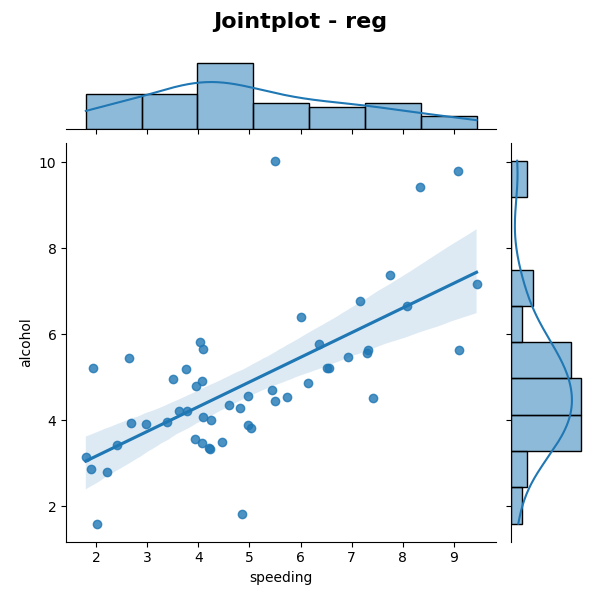

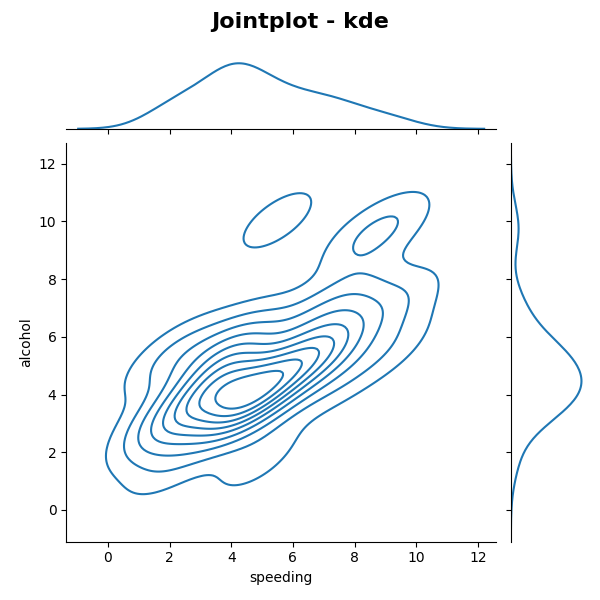

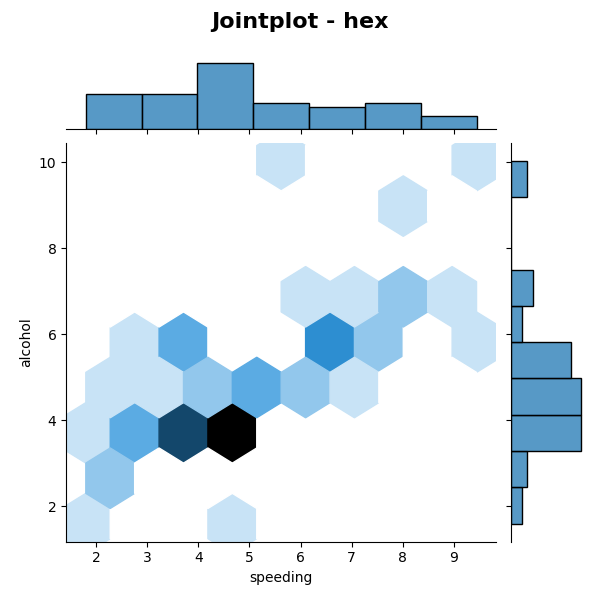

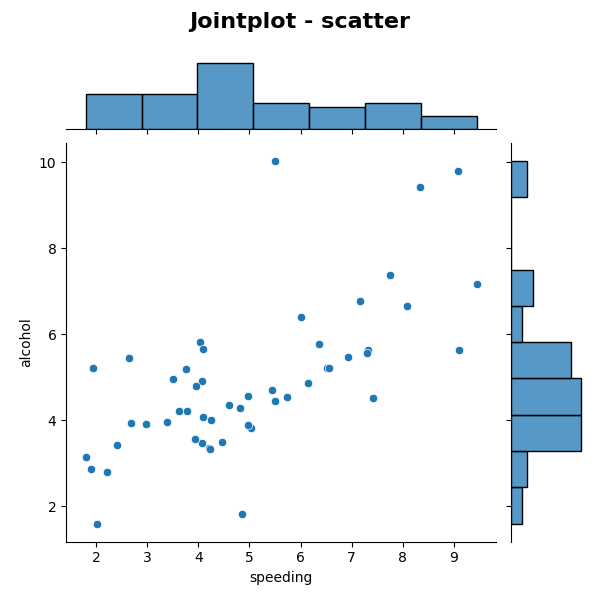

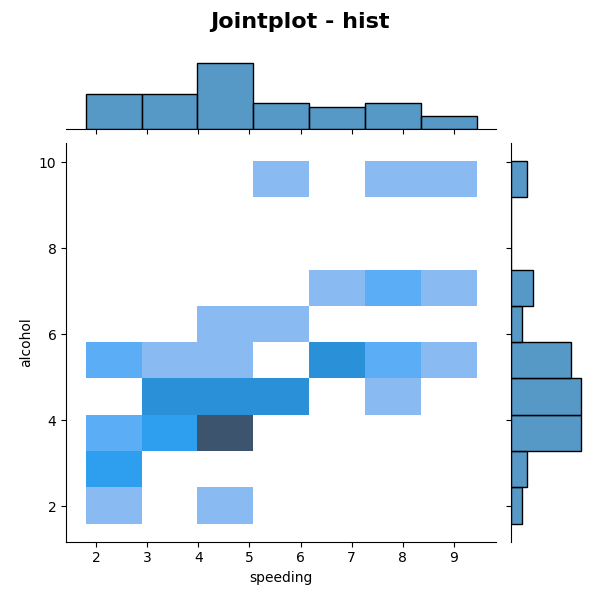

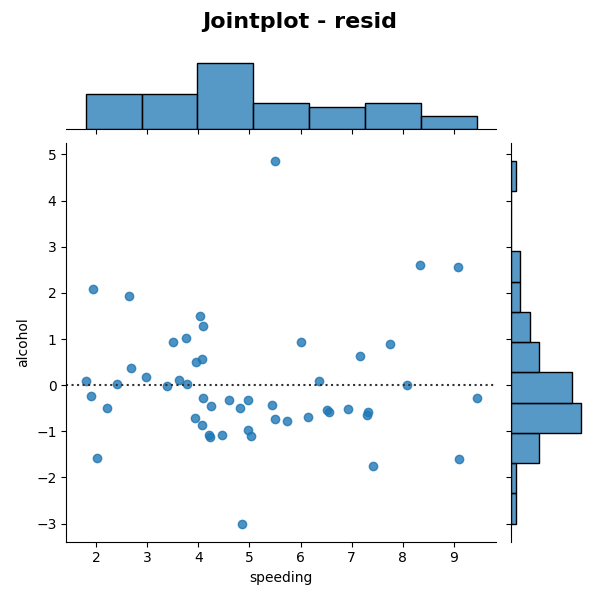

In [4]:
plot_type = ['reg', 'kde', 'hex', 'scatter', 'hist', 'resid'] # Liste mit allen Plot Typen
for kind in plot_type:
    plot = sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind=kind) # Erstellt alle Plots aus der Liste
    plot.figure.suptitle(f"Jointplot - {kind}", fontsize=16, fontweight='bold') # Setzt den Titel für jeden Plot
    plot.figure.subplots_adjust(top=0.9) # Setzt den Abstand zwischen den Plots


### KDE Plot
Ein KDE-Plot (Kernel Density Estimation Plot) ist eine Methode zur Visualisierung der Wahrscheinlichkeitsverteilung einer kontinuierlichen Variable. Sie erstellt die glatte Vertielung von Daten dar, anstatt sie als Balken wie in einem Historgramm anzuzeigen.

Was macht ein KDE-Plot?
- Er schätzt die Wahrscheinlichkeitsdichte einer Variable.
- Statt wie Balkn (wie im Histogramm) wird eine glatte Linie gezeichnet.
- Die Fläche unter der Kurve beträgt immer 1, da sie eine Wahrscheinlichkeitsverteilung darstellt.

Histogramm vs. KDE
- Histogramm zeigt die Verteilung als Balken, der KDE-Plot darüber als Linie.

#### Warum KDE statt Histogramm?

| Feature        | Histogramm 🏗 | KDE-Plot 📈 |
|--------------|--------------|-----------|
| **Darstellung** | Zeigt Werte in festen **Balken** | Zeigt eine **glatte Kurve** |
| **Flexibilität** | Abhängig von der `bins`-Anzahl | Automatische Schätzung der Dichte |
| **Visualisierung** | Kann stufig wirken | Weiche Übergänge zwischen Bereichen |
| **Nützlich für** | Wenn exakte Häufigkeiten gewünscht sind | Wenn die Gesamtverteilung klar erkennbar sein soll |

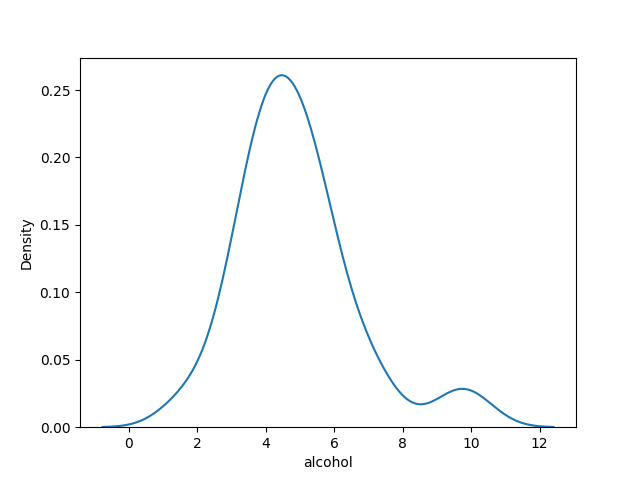

In [5]:
# Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
plt.figure()

# KDE-Plot zeichnen
sns.kdeplot(crash_df['alcohol'])
plt.show()

### Pair Plots (Paarweise Diagramme)

Ein **Pair Plot** (`sns.pairplot()`) visualisiert **Beziehungen zwischen mehreren numerischen Variablen** in einem Dataset.  
Dabei werden **alle Variablen paarweise** als Scatterplots dargestellt, während die Diagonale oft ein Histogramm oder eine KDE-Dichtekurve zeigt.

#### Vorteile:
- Zeigt **Zusammenhänge zwischen Variablen** in einer einzigen Visualisierung.
- Erkennt **lineare oder nicht-lineare Beziehungen** zwischen Features.
- Hilft, **Ausreißer und Cluster** zu identifizieren.

#### Wichtige Parameter:
- **`hue='category'`** → Färbt die Punkte basierend auf einer kategorialen Variable, um Gruppen zu unterscheiden.  
  _(z. B. `hue='gender'` markiert Männer und Frauen unterschiedlich)_
- **`palette='Set2'`** → Bestimmt die Farbpalette für unterschiedliche Gruppen, wenn `hue` verwendet wird.  
  _(Alternativen: `'coolwarm'`, `'viridis'`, `'pastel'`, `'deep'`, etc.)_
- **`kind='reg'`** → Fügt Regressionslinien hinzu, um lineare Zusammenhänge zu erkennen.
- **`diag_kind='kde'`** → Zeigt Dichtekurven statt Histogrammen für eine bessere Visualisierung der Verteilung.
- **`markers=['o', 's', 'D']`** → Definiert verschiedene Marker-Stile für Gruppen in hue.
_(z. B. o = Kreis, s = Quadrat, D = Raute.)_
- **`height=2.5`** → Bestimmt die Größe jedes einzelnen Subplots im Pair Plot.
_(Standardwert ist 2.5, höhere Werte vergrößern die Plots.)_

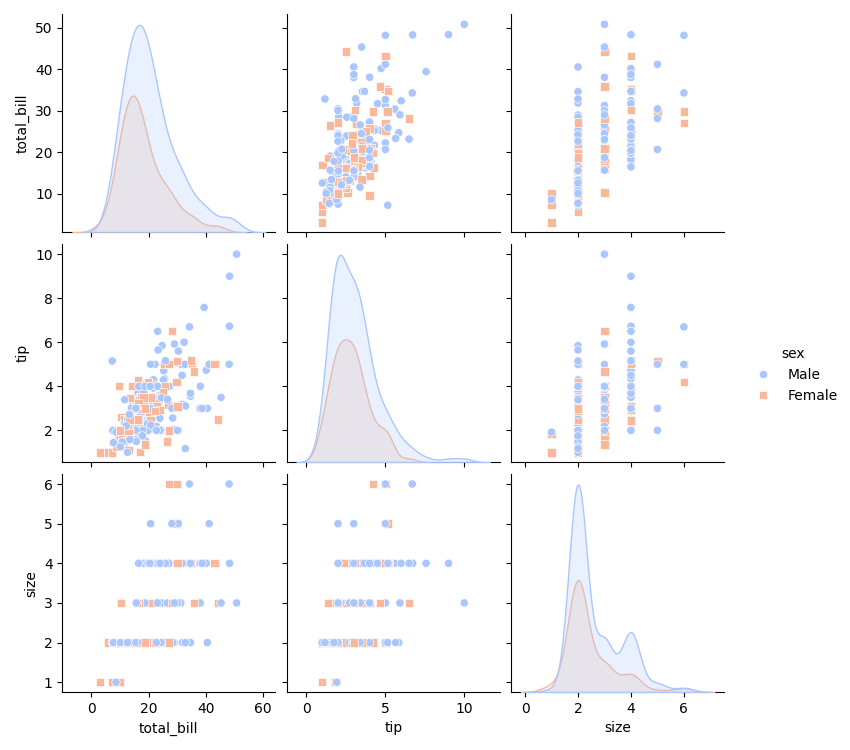

In [6]:
tips_df = sns.load_dataset('tips')

sns.pairplot(tips_df, hue='sex', palette='coolwarm', kind='scatter', diag_kind='kde', markers=['o', 's'], height=2.5)


### Rug Plot (Teppichdiagramm)

Ein **Rug Plot** (`sns.rugplot()`) ist eine einfache Visualisierung zur Darstellung der **Verteilung einzelner Datenpunkte** entlang einer Achse.  
Die Punkte werden als kleine **Striche ("Teppichstreifen") entlang der Achse** dargestellt, wodurch Muster und Dichten in den Daten sichtbar werden.

#### Vorteile

- Zeigt **exakte Positionen einzelner Datenpunkte**, anstatt sie in Bins wie beim Histogramm zu aggregieren.  
- Nützlich, um **Cluster, Lücken oder extreme Werte (Ausreißer)** zu erkennen.  
- Kann mit anderen Plots wie **Histogrammen, KDE-Plots oder Scatterplots** kombiniert werden, um zusätzliche Kontextinformationen bereitzustellen.  

#### Wichtige Parameter

- **`height=0.05`** → Bestimmt die Länge der Striche relativ zur Achse.  
  *(Ein niedrigerer Wert macht sie kürzer, Standardwert ist `0.05`.)*  
- **`hue='category'`** → Färbt die Striche basierend auf einer kategorialen Variable, um Gruppen zu unterscheiden.  
- **`palette='Set2'`** → Bestimmt die Farbpalette für verschiedene Gruppen, wenn `hue` verwendet wird.  
  *(Alternativen: `'coolwarm'`, `'viridis'`, `'pastel'`, `'deep'`, etc.)*  
- **`lw=1`** → Setzt die Breite der Striche.  
  *(Größere Werte machen die Striche dicker.)*  
- **`alpha=0.7`** → Bestimmt die Transparenz der Striche.  
  *(Werte zwischen `0.0` und `1.0`, wobei `1.0` vollständig sichtbar ist.)*  
- **`ax=ax`** → Ermöglicht das Platzieren des Rug Plots auf einem vorhandenen Matplotlib-Plot, um ihn mit anderen Visualisierungen zu kombinieren.  

Rug Plots sind besonders nützlich zur Darstellung der Rohdatenverteilung in Kombination mit KDE-Plots oder Histogrammen.


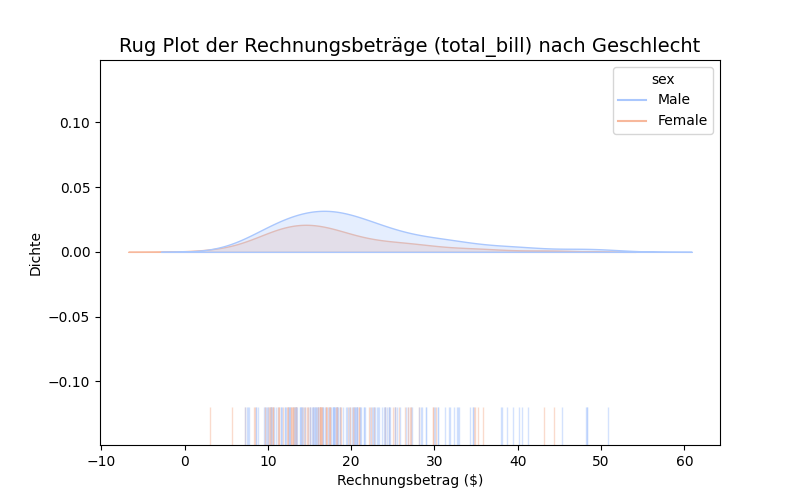

In [7]:
# Lade das 'tips'-Dataset
tips = sns.load_dataset("tips")

# Erstelle die Figur und Achse
plt.figure(figsize=(8, 5))

# KDE-Plot für eine sanfte Verteilungskurve
sns.kdeplot(x=tips["total_bill"], hue=tips["sex"], fill=True, alpha=0.3, palette="coolwarm")

# Manuelles Jittering für den Rug Plot:
jitter_strength = 0.1  # Stärke der zufälligen Verschiebung
jittered_y = np.random.uniform(-jitter_strength, jitter_strength, size=len(tips["total_bill"]))

# Rug Plot mit verbesserten Parametern
sns.rugplot(
    x=tips["total_bill"], 
    hue=tips["sex"], 
    palette="coolwarm", 
    height=0.1,  # Kürzere Striche
    lw=1.2,  # Dünnere Linien für bessere Lesbarkeit
    alpha=0.5  # Leicht transparent, um Überlagerung zu reduzieren
)

# Punkte leicht nach oben/unten verschieben, um Überlappung zu vermeiden
plt.scatter(tips["total_bill"], jittered_y, alpha=0)  # Unsichtbare Punkte für Achsenerweiterung

# Titel und Labels setzen
plt.title("Rug Plot der Rechnungsbeträge (total_bill) nach Geschlecht", fontsize=14)
plt.xlabel("Rechnungsbetrag ($)")
plt.ylabel("Dichte")

# Zeige den Plot
plt.show()


### Styling von Seaborn-Plots

Seaborn bietet umfangreiche Möglichkeiten zur Anpassung des Stils von Diagrammen.  
Dazu gehören **Farbpaletten, Hintergründe, Schriftarten und Achseneinstellungen**, die das visuelle Erscheinungsbild von Plots verbessern.

#### 1. Setzen eines allgemeinen Stils

Seaborn stellt verschiedene vordefinierte Stile zur Verfügung:

- **`darkgrid`** → Standardstil mit grauem Gitter (ideal für explorative Analysen).
- **`whitegrid`** → Weißer Hintergrund mit Gitterlinien (gute Balance zwischen Übersichtlichkeit und Detail).
- **`dark`** → Dunkler Hintergrund ohne Gitterlinien.
- **`white`** → Minimalistischer Stil ohne Gitter.
- **`ticks`** → Ähnlich wie `white`, aber mit deutlicheren Achsenticks.

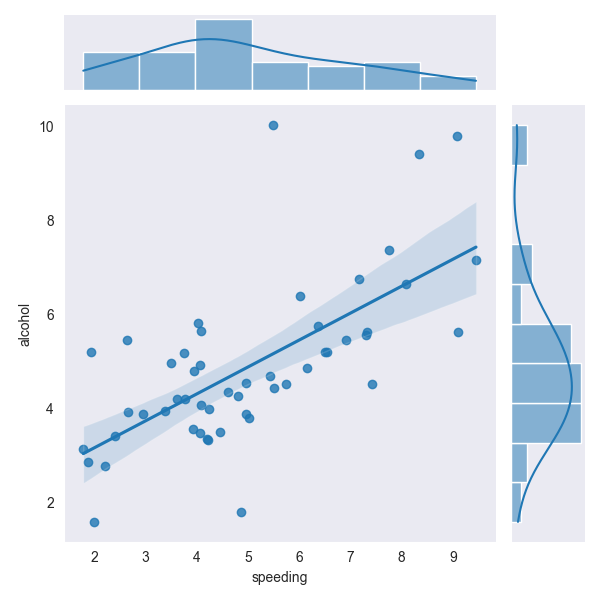

In [8]:
tips_df = sns.load_dataset('tips') # Lade das 'tips'-Dataset
sns.set_style('dark') # Setzt den globalen Parameter für nachfolgende Plots die keinen eigenen Style haben
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind = 'reg') # Erstellt den Pairplot
# ----------------- #

plt.show()

#### Farbschemata mit palette
Mit palette lassen sich **Farbschemata** definieren:

- Vordefinierte Paletten: 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'
- Sequentielle Paletten (für kontinuierliche Daten): 'Blues', 'BuGn', 'OrRd', 'coolwarm'
- Divergente Paletten (für zwei gegensätzliche Gruppen): 'RdBu_r', 'Spectral'
- Manuelle Anpassung mit Hex-Werten:

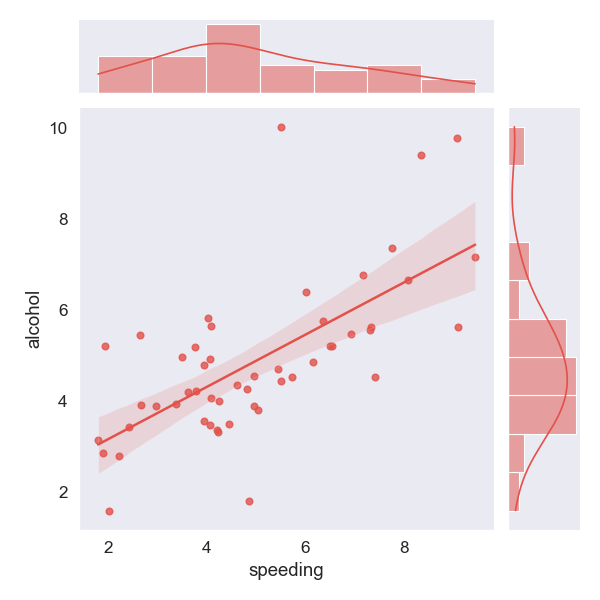

In [22]:
sns.set_palette('Spectral')  # Setzt eine globale Farbpalette für alle nachfolgenden Plots, die keine eigene palette haben
tips_df = sns.load_dataset('tips') # Lade das 'tips'-Dataset
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind = 'reg') # Erstellt den Pairplot
plt.show()

#### Skalierung des Plots mit context
Die Funktion sns.set_context() passt die Skalierung von Texten und Elementen an:

- paper → Kleinere Elemente für Berichte.
- notebook → Standardgröße für Jupyter Notebooks.
- talk → Größere Texte für Präsentationen.
- poster → Noch größere Beschriftungen für Poster.

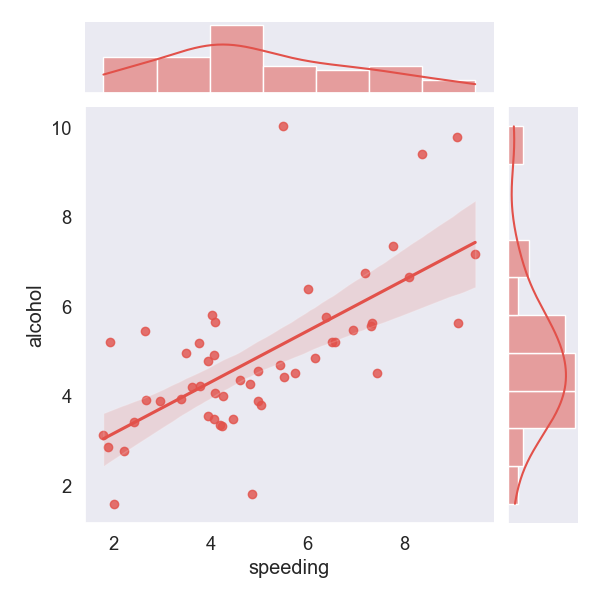

In [25]:
tips_df = sns.load_dataset('tips') # Lade das 'tips'-Dataset
sns.set_context("poster")  # Vergrößert Labels und Achsenbeschriftungen für Präsentationen alternative Parameter: paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.2)  # Erhöht die Schriftgröße um 20 % gegenüber der Standardgröße
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind = 'reg') # Erstellt den Pairplot
plt.show()

### Entfernen von Spines (Rahmenlinien)
Um den Plot minimalistisch zu gestalten, können die Rahmenlinien entfernt oder angepasst werden:

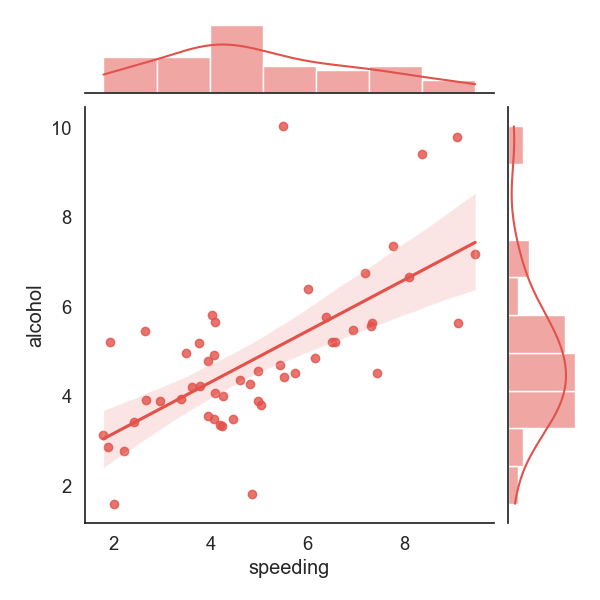

In [11]:
sns.set_style("white")
sns.kdeplot(x=[1, 2, 2.5, 3, 4, 5], fill=True)
sns.despine()  # Entfernt obere und rechte Achsenlinie
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind = 'reg') # Erstellt den Pairplot
plt.show()

### Kombination mehrerer Einstellungen
Seaborn-Stiloptionen können kombiniert werden, um ein einheitliches Design zu schaffen:

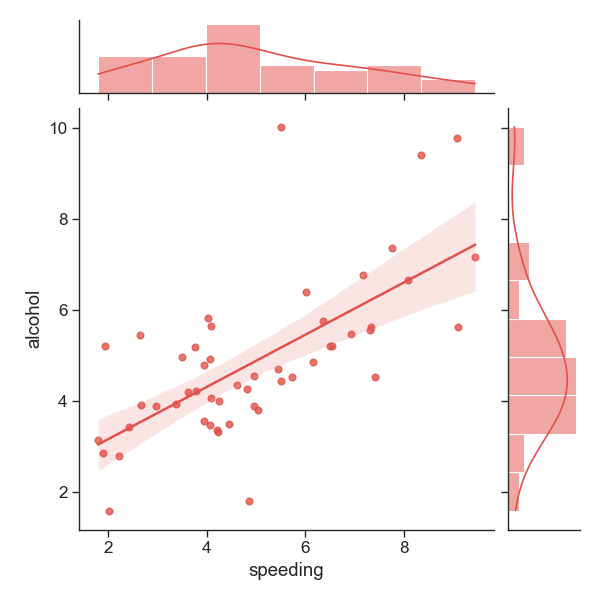

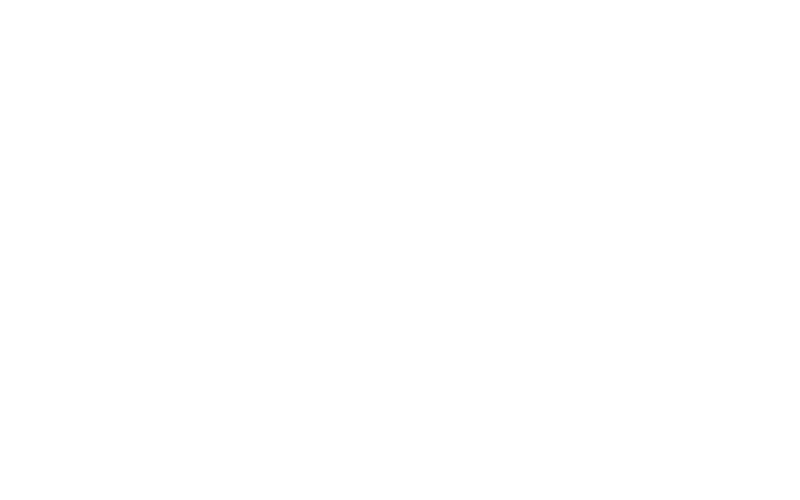

In [12]:
sns.set_style("ticks") # Setzt den globalen Style auf 'whitegrid' alternative Styles: darkgrid, white, dark, ticks
plt.figure(figsize=(8, 5)) # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
sns.set_context("paper", font_scale=1.4)  # Setzt den globalen Parameter für nachfolgende Plots die keinen eigenen Context haben alternative Parameter: paper, notebook, talk, poster
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind = 'reg') # Erstellt den Pairplot
sns.despine()  # Entfernt Achsenlinie alternative Parameter: left, bottom, top, right
plt.show()

### Categorical Plots

#### Parameter für verschiedene Seaborn Categorical Plots

| Parameter               | Beschreibung | Gilt für |
|-------------------------|-------------|---------|
| **`x` / `y`**          | Definiert die kategoriale (`x`) und numerische (`y`) Achse. Falls `y` weggelassen wird (bei `countplot()`), wird die Anzahl gezählt. | Bar, Count, Box, Violin, Strip, Swarm |
| **`hue`**              | Färbt nach einer dritten kategorialen Variable (z. B. Geschlecht). | Bar, Count, Box, Violin, Strip, Swarm |
| **`palette`**          | Definiert das Farbschema (`"Blues"`, `"coolwarm"`, `"pastel"`, etc.). | Bar, Count, Box, Violin, Strip, Swarm |
| **`order`**            | Legt die Reihenfolge für Kategorien auf der x-Achse fest (z. B. `['Thur', 'Fri', 'Sat', 'Sun']`). | Bar, Count, Box, Violin, Strip, Swarm |
| **`hue_order`**        | Definiert eine bestimmte Reihenfolge für die `hue`-Kategorien. | Bar, Count, Box, Violin, Strip, Swarm |
| **`dodge=True`**       | Falls `hue` verwendet wird: `True` zeigt Gruppen nebeneinander, `False` zeigt sie übereinander gestapelt. | Bar, Count, Box, Violin, Strip, Swarm |
| **`width=0.8`**        | Bestimmt die Breite der Balken oder Boxen (Werte zwischen `0` und `1`). | Bar, Count, Box, Violin |
| **`linewidth=1.5`**    | Setzt die Dicke der Ränder der Balken oder Boxen. | Bar, Count, Box, Violin |
| **`edgecolor="black"`** | Legt die Farbe der Balkenkonturen fest. | Bar, Count |
| **`ci=95`**            | Zeigt ein **95%-Konfidenzintervall** (Standardwert). `ci=None` entfernt das Konfidenzintervall. `ci="sd"` zeigt die Standardabweichung. | Bar |
| **`estimator=np.mean`** | Aggregiert Werte für jede Kategorie. Alternativen: `np.median`, `np.sum`, `len`, `np.std`, `np.var`, `np.min`, `np.max`. | Bar |
| **`log=True`**         | Verwendet eine logarithmische Skalierung auf der y-Achse. | Bar, Count, Box, Violin |
| **`orient='h'`**       | Erstellt eine horizontale Version des Plots (`'h'` für horizontal, `'v'` für vertikal). | Bar, Count, Box, Violin |
| **`ax=ax`**            | Zeichnet den Plot auf einer bestimmten Achse (wichtig für Subplots). | Bar, Count, Box, Violin, Strip, Swarm |
| **`saturation=0.75`**  | Steuert die Farbintensität (`1` = volle Sättigung). | Bar, Count, Box, Violin |
| **`alpha=0.8`**        | Setzt die Transparenz der Balken oder Punkte (`1.0` = volle Deckkraft, `0.0` = unsichtbar). | Bar, Count, Strip, Swarm |
| **`showfliers=True`**  | Zeigt oder versteckt Ausreißer (`False` blendet sie aus). | Box |
| **`notch=False`**      | Fügt Einkerbungen hinzu, um die Median-Konfidenzintervalle zu zeigen. | Box |
| **`showmeans=True`**   | Zeigt den Mittelwert zusätzlich zur Box-Statistik. | Box |
| **`split=True`**       | Teilt das Violin-Plot in zwei Hälften, wenn `hue` verwendet wird. | Violin |
| **`inner='box'`**      | Zeigt zusätzlich Boxplots innerhalb des Violin-Plots (`'quartile'`, `'point'`, `'stick'`). | Violin |
| **`bw=0.2`**           | Glättungsparameter für die Kernel-Dichte-Schätzung. | Violin |
| **`cut=0`**            | Beschränkt den Plot auf den Datenbereich (`cut=2` erlaubt Überschreitungen). | Violin |
| **`jitter=True`**      | Fügt eine leichte Zufallsverschiebung hinzu, um Überlappungen zu reduzieren. | Strip |
| **`size=5`**           | Setzt die Größe der Punkte. | Strip, Swarm |
| **`native_scale=True`** | Nutzt eine natürliche Skalierung basierend auf den Daten. | Swarm |


### Bar Plots (Balkendiagramme)

Ein **Bar Plot** (`sns.barplot()`) stellt kategoriale Daten als Balkendiagramm dar.  
Dabei zeigt die x-Achse eine kategoriale Variable, während die y-Achse den Durchschnitt einer numerischen Variable angibt.

#### Vorteile:
- Aggregiert Daten automatisch und zeigt den **Mittelwert** der y-Werte für jede Kategorie.
- Zeigt **Konfidenzintervalle**, um Unsicherheiten zu visualisieren.
- Unterstützt Farbcodierung über `hue`, um Gruppen innerhalb einer Kategorie zu vergleichen.

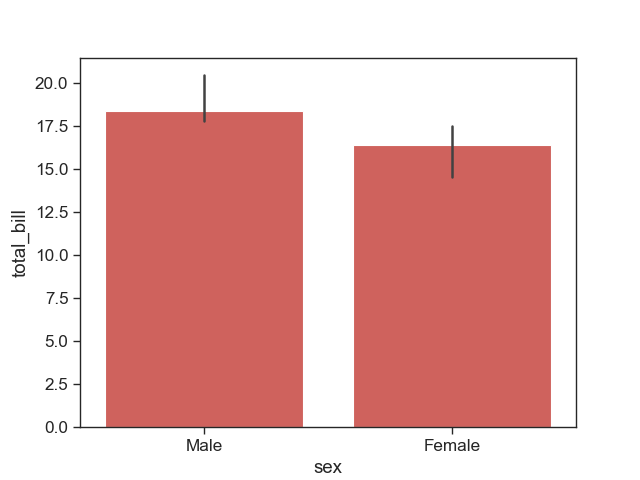

In [13]:
plt.figure() # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median) # Erstellt den Barplot mit einem Estimator alternative Estimator: np, np.median, np.mean, np.std
# weitere alterantive Parameter: ci, capsize, dodge, palette, order, hue, orient, color
plt.show()

### Count Plots (Häufigkeitsdiagramme)

Ein **Count Plot** (`sns.countplot()`) ist eine Variante des Balkendiagramms, das die **Häufigkeit** von Kategorien zählt und anzeigt.  
Im Gegensatz zu `sns.barplot()`, das eine Aggregation wie den Mittelwert berechnet, **zeigt ein Count Plot die Anzahl der Beobachtungen pro Kategorie**.

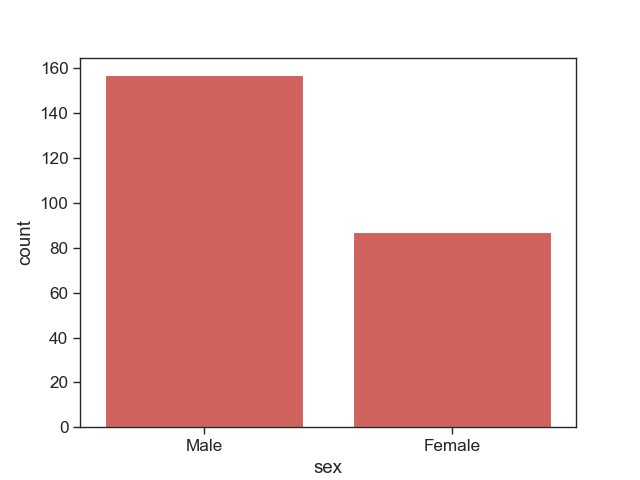

In [14]:
plt.figure() # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
sns.countplot(x='sex', data=tips_df) # Erstellt den Countplot der grundsätzlich nur die Anzahl der Werte zählt
plt.show()

### Box Plot (Box-Whisker-Diagramm)

Ein **Box Plot** (`sns.boxplot()`) ist eine statistische Visualisierung zur Darstellung der **Verteilung einer numerischen Variable** innerhalb einer oder mehrerer Kategorien.  

Der Plot zeigt:
- **Median (Q2, 50%-Quantil)** – Die mittlere Linie in der Box.
- **Interquartilsabstand (IQR, zwischen Q1 und Q3)** – Die Box zeigt den Bereich, in dem die mittleren 50 % der Daten liegen.
- **Whiskers (Antennen)** – Zeigen den Bereich der nicht-ausreißenden Werte.
- **Ausreißer** – Punkte außerhalb des normalen Datenbereichs.

#### Vorteile:
- Zeigt **zentrale Tendenz und Streuung** der Daten in einem kompakten Format.
- Identifiziert **Ausreißer**, die außerhalb der Whiskers liegen.
- Erlaubt **Vergleiche zwischen Gruppen**, wenn `hue` verwendet wird.

Box Plots eignen sich besonders zur **Datenanalyse in explorativen Studien** und zur **Vergleichsanalyse zwischen Gruppen**.


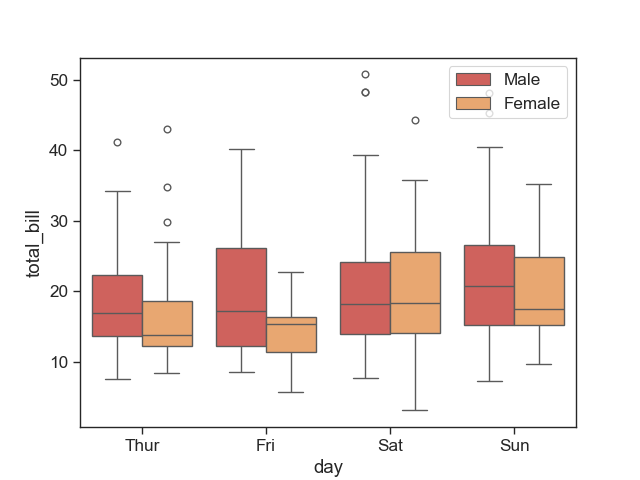

In [15]:
plt.figure() # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex') # Erstellt den Boxplot
plt.legend(loc='upper right') # Setzt die Position des Legends alternative Parameter sind 'upper left', 'upper right', 'lower left', 'lower right'
plt.show()

### Violin Plot

Ein **Violin Plot** (`sns.violinplot()`) kombiniert die Eigenschaften eines **Box Plots** und eines **KDE-Plots (Dichtediagramms)**.  
Er visualisiert die **Verteilung einer numerischen Variable** innerhalb einer oder mehrerer Kategorien.  

Der Plot zeigt:
- **Box Plot-Elemente** – Den Median und den Interquartilsabstand (IQR).
- **Dichteverteilung (Kernel Density Estimation, KDE)** – Eine symmetrische Kurve um die Box, die zeigt, wie häufig Werte auftreten.
- **Whiskers und Ausreißer** – Optional je nach Konfiguration sichtbar.

#### Vorteile:
- Zeigt die **vollständige Verteilung der Daten**, nicht nur Zusammenfassungsstatistiken wie ein Box Plot.
- Identifiziert **Mehrgipfligkeit** (mehrere Modi) in der Datenverteilung.
- Eignet sich gut für **Vergleiche zwischen Gruppen**, wenn `hue` verwendet wird.

Violin Plots eignen sich besonders für die **Visualisierung von Verteilungen**, insbesondere wenn die Form der Daten wichtig ist.


C:\Users\samue\AppData\Local\Temp\ipykernel_163836\3160451682.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure() # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet


<Axes: xlabel='day', ylabel='total_bill'>

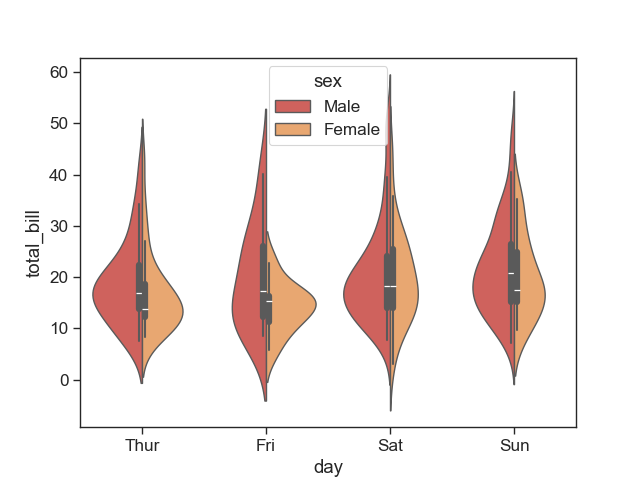

In [16]:
plt.figure() # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True) # Erstellt den Violinplot 

### Strip Plot

Ein **Strip Plot** (`sns.stripplot()`) ist eine Visualisierung, die **einzelne Datenpunkte entlang einer kategorialen Achse** anzeigt.  
Er ähnelt einem Scatter Plot, wird aber für kategoriale Daten verwendet.  

Der Plot zeigt:
- **Jeden einzelnen Datenpunkt**, anstatt aggregierte Werte wie in Box oder Violin Plots.
- **Verteilung innerhalb einer Kategorie**, indem Punkte entlang der y-Achse gestreut werden.
- **Überlappungen**, wenn viele Punkte denselben Wert haben (diese können mit `jitter=True` aufgelockert werden).

#### Vorteile:
- Zeigt die **Rohdaten**, ohne sie zusammenzufassen oder zu aggregieren.
- Hilft, **Ausreißer** und **Datenverteilung innerhalb einer Kategorie** zu erkennen.
- Kann mit Box oder Violin Plots kombiniert werden, um zusätzliche Informationen darzustellen.

Strip Plots eignen sich besonders gut für **die Analyse der individuellen Datenverteilung innerhalb einer Kategorie** und können mit Box oder Violin Plots kombiniert werden, um zusätzliche Informationen bereitzustellen.


<Axes: xlabel='day', ylabel='total_bill'>

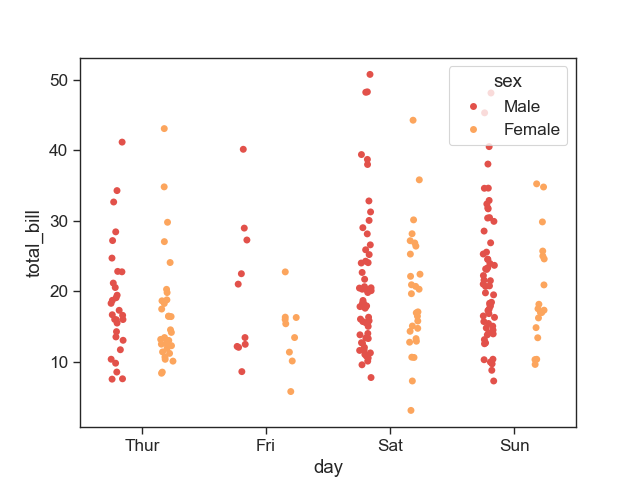

In [17]:
plt.figure() # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
plt.figsize=(10, 6) # Setzt die Größe der Figur

sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True) # Erstellt den Stripplot

### Swarm Plot

Ein **Swarm Plot** (`sns.swarmplot()`) ist eine erweiterte Version des Strip Plots, bei der sich die Punkte **nicht überlappen**.  
Stattdessen werden die Datenpunkte **seitlich verteilt**, sodass ihre Dichte sichtbar bleibt.  

Der Plot zeigt:
- **Jeden einzelnen Datenpunkt** auf einer kategorialen Achse.
- **Keine Überlappung**, da die Punkte algorithmisch verteilt werden.
- **Datenverteilung innerhalb einer Kategorie**, ähnlich wie bei Strip oder Violin Plots.

#### Vorteile:
- **Verhindert Überlappungen**, sodass alle Datenpunkte sichtbar bleiben.
- Zeigt **die Form der Verteilung**, ohne eine Dichteschätzung (wie bei Violin Plots).
- Kann mit Box oder Violin Plots kombiniert werden, um zusätzliche Informationen zu geben.


<Axes: xlabel='day', ylabel='total_bill'>

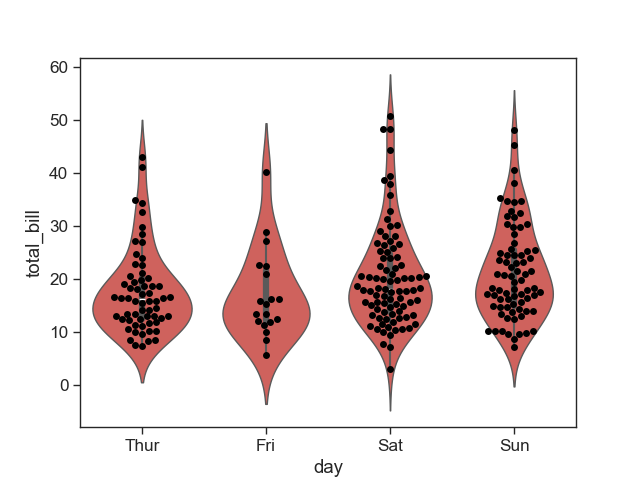

In [18]:
plt.figure() # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet
sns.violinplot(x='day', y='total_bill', data=tips_df) # Erstellt den Violinplot
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='black') # Erstellt den Swarmplot und setzt die Farbe auf schwarz

### Farbpaletten in Seaborn (`palette`)

Seaborn bietet eine Vielzahl an **Farbpaletten**, um Plots visuell ansprechend und verständlich zu gestalten.  
Mit der **`palette`-Option** können Farben individuell angepasst werden.

---

#### Vordefinierte Farbpaletten
Seaborn stellt verschiedene vordefinierte Paletten bereit:

| Palette-Typ     | Beispiele |
|-----------------|-----------|
| **Standard** | `"deep"`, `"muted"`, `"bright"`, `"pastel"`, `"dark"`, `"colorblind"` |
| **Sequentiell (für Skalen von niedrig zu hoch)** | `"Blues"`, `"Greens"`, `"Oranges"`, `"Purples"`, `"Reds"` |
| **Divergent (für zwei gegensätzliche Gruppen)** | `"coolwarm"`, `"Spectral"`, `"RdBu_r"`, `"PiYG"` |
| **Kategorisch (für Gruppen)** | `"Set1"`, `"Set2"`, `"Set3"`, `"Paired"`, `"Pastel1"`, `"Dark2"` |

Beispiel für die Nutzung einer vordefinierten Palette:

```python
sns.set_palette("pastel")  # Setzt eine helle Farbpalette für alle folgenden Plots

#### Manuelle Farbanpassung mit Hex-Codes
Es ist auch möglich, eine benutzerdefinierte Farbpalette mit Hex-Codes oder RGB-Werten zu definieren:
sns.set_palette(["#1f77b4", "#ff7f0e", "#2ca02c"])  # Drei Farben festlegen

#### Farbpaletten mit sns.color_palette() anzeigen
Seaborn ermöglicht die Anzeige einer Farbpalette mit:
sns.color_palette("coolwarm", as_cmap=True)  # Gibt eine Matplotlib-Farbkarte zurück

Um eine Farbpalette als Liste von RGB-Werten zu erhalten:
print(sns.color_palette("Set2"))

#### Dynamische Farbzuweisung mit palette in Plots
Die palette-Option kann in vielen Seaborn-Plot-Funktionen verwendet werden:
sns.barplot(x="day", y="total_bill", data=tips, palette="coolwarm")


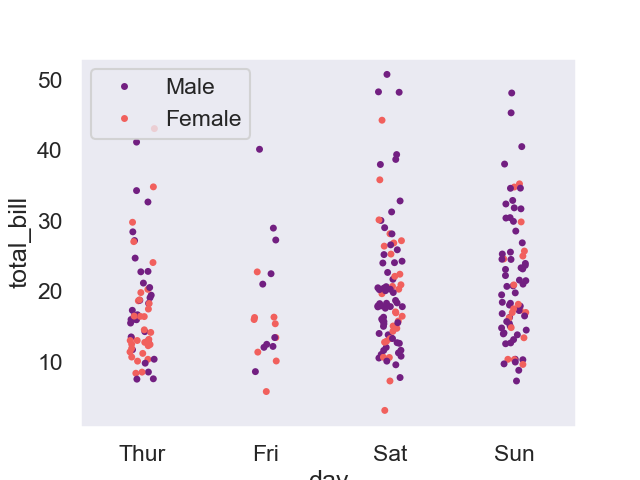

In [19]:
plt.figure() # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet

sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='magma') # Erstellt den Stripplot. Die Palleten können unter https://seaborn.pydata.org/tutorial/color_palettes.html eingesehen werden
plt.legend(loc='upper left') # Setzt die Position des Legends alternative Parameter sind 'upper left', 'upper right', 'lower left', 'lower right'. Die Optionen können unter https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html eingesehen werden
plt.figuresize=(10, 6) # Setzt die Größe der Figur

## Matrix Plots in Seaborn

**Matrix Plots** sind eine spezielle Art von Visualisierung, die verwendet wird, um **Zusammenhänge zwischen numerischen Daten in einer tabellarischen Struktur** darzustellen.  
Sie eignen sich besonders für **Heatmaps und Cluster-Analysen**, um Muster, Korrelationen oder Gruppierungen in Daten zu erkennen.

Seaborn bietet mehrere Funktionen zur Erstellung von Matrix Plots:

1. **`sns.heatmap()`** – Erstellt eine Heatmap, um die Werte einer Matrix als Farbverlauf darzustellen.
2. **`sns.clustermap()`** – Eine erweiterte Heatmap mit hierarchischer Clusteranalyse.
3. **`sns.pairplot()`** – Erstellt eine Streudiagramm-Matrix für paarweise Beziehungen zwischen Variablen.

### **Wann werden Matrix Plots verwendet?**
- Um **Korrelationen** zwischen Variablen zu analysieren (z. B. mit einer Heatmap der Korrelationsmatrix).
- Zur **Cluster-Analyse**, um ähnliche Gruppen in Daten zu identifizieren.
- Zur **Erkennung von Mustern** in großen numerischen Datensätzen.

Matrix Plots helfen dabei, **komplexe Beziehungen zwischen Variablen visuell zu erfassen** und sind besonders nützlich für explorative Datenanalysen.

### Vergleich der Parameter für Heatmaps, Clustermaps und Pairplots

| Parameter             | Beschreibung | Gilt für `heatmap()` | Gilt für `clustermap()` | Gilt für `pairplot()` |
|-----------------------|-------------|----------------------|------------------------|----------------------|
| **`data`**           | Die darzustellende Matrix oder der DataFrame. | ✅ | ✅ | ✅ |
| **`cmap`**           | Definiert das Farbschema (`"Blues"`, `"coolwarm"`, `"viridis"`, etc.). | ✅ | ✅ | ❌ |
| **`annot=True`**     | Zeigt numerische Werte innerhalb der Zellen an. | ✅ | ✅ | ❌ |
| **`fmt='.2f'`**      | Formatiert die Zahlenanzeige (`.2f` für zwei Dezimalstellen). | ✅ | ✅ | ❌ |
| **`linewidths=0.5`** | Fügt Linien zwischen den Zellen hinzu. | ✅ | ✅ | ❌ |
| **`linecolor='black'`** | Setzt die Farbe der Linien zwischen den Zellen. | ✅ | ✅ | ❌ |
| **`cbar=True`**      | Aktiviert oder deaktiviert die Farbskala. | ✅ | ✅ | ❌ |
| **`vmin` / `vmax`**  | Setzt minimale und maximale Werte für die Farbskalierung. | ✅ | ✅ | ❌ |
| **`square=True`**    | Erzwingt quadratische Zellen. | ✅ | ✅ | ❌ |
| **`xticklabels=True`** | Zeigt oder versteckt x-Achsen-Beschriftungen. | ✅ | ✅ | ❌ |
| **`yticklabels=True`** | Zeigt oder versteckt y-Achsen-Beschriftungen. | ✅ | ✅ | ❌ |
| **`dendrogram_ratio=0.2`** | Verhältnis der Dendrogrammhöhe zur Heatmap (nur für Cluster). | ❌ | ✅ | ❌ |
| **`row_cluster=True`** | Aktiviert oder deaktiviert Clustering für Zeilen. | ❌ | ✅ | ❌ |
| **`col_cluster=True`** | Aktiviert oder deaktiviert Clustering für Spalten. | ❌ | ✅ | ❌ |
| **`method='average'`** | Cluster-Methode (`'single'`, `'complete'`, `'average'`, etc.). | ❌ | ✅ | ❌ |
| **`standard_scale=1`** | Standardisiert die Daten für eine Achse (0 = Zeilen, 1 = Spalten). | ❌ | ✅ | ❌ |
| **`hue`**            | Kategorisiert Punkte anhand einer dritten Variablen. | ❌ | ❌ | ✅ |
| **`palette='pastel'`** | Definiert das Farbschema für `hue`. | ❌ | ❌ | ✅ |
| **`diag_kind='kde'`** | Setzt den Plot-Typ für die Diagonale (`'kde'` oder `'hist'`). | ❌ | ❌ | ✅ |
| **`kind='scatter'`** | Wählt den Scatterplot-Typ (`'scatter'`, `'reg'`, `'kde'`, etc.). | ❌ | ❌ | ✅ |
| **`markers=['o', 's']`** | Definiert Markersymbole für Scatterplots. | ❌ | ❌ | ✅ |
| **`corner=True`** | Zeigt nur die untere Dreiecksmatrix. | ❌ | ❌ | ✅ |
| **`height=2.5`** | Setzt die Größe der Subplots. | ❌ | ❌ | ✅ |


### Heatmaps in Seaborn

Eine **Heatmap** (`sns.heatmap()`) ist eine Visualisierungsmethode zur Darstellung von **numerischen Werten in einer Matrix**.  
Die Werte werden durch Farben repräsentiert, wodurch Muster, Korrelationen oder Extremwerte leicht erkennbar sind.


#### Wann sind Heatmaps nützlich?
- **Analyse von Korrelationen** zwischen Variablen (z. B. mit einer Korrelationsmatrix).
- **Visualisierung von Mustern** in großen Datensätzen.
- **Identifikation von Ausreißern** oder Cluster-Bildung in Daten.


#### Wichtige Parameter für `sns.heatmap()`
| Parameter | Beschreibung |
|-----------|-------------|
| **`data`** | Die darzustellende Matrix (z. B. `df.corr()` für eine Korrelationsmatrix). |
| **`annot=True`** | Zeigt die numerischen Werte innerhalb der Zellen an. |
| **`fmt='.2f'`** | Bestimmt das Zahlenformat in den Zellen (`.2f` für zwei Dezimalstellen). |
| **`cmap='coolwarm'`** | Definiert das Farbschema (`"Blues"`, `"viridis"`, `"magma"`, etc.). |
| **`linewidths=0.5`** | Fügt Linien zwischen den Zellen hinzu, um die Struktur zu verbessern. |
| **`vmin` / `vmax`** | Setzt minimale und maximale Werte für die Farbskalierung. |
| **`cbar=True`** | Aktiviert oder deaktiviert die Farbskala rechts neben der Heatmap. |


#### Heatmaps für Korrelationen
Ein häufiger Anwendungsfall für Heatmaps ist die Visualisierung einer **Korrelationsmatrix**:

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Beispiel-Datensatz laden
tips = sns.load_dataset("tips")

# Korrelationsmatrix berechnen
corr_matrix = tips.corr()

# Heatmap erstellen
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Korrelationsmatrix der numerischen Variablen")
plt.show()


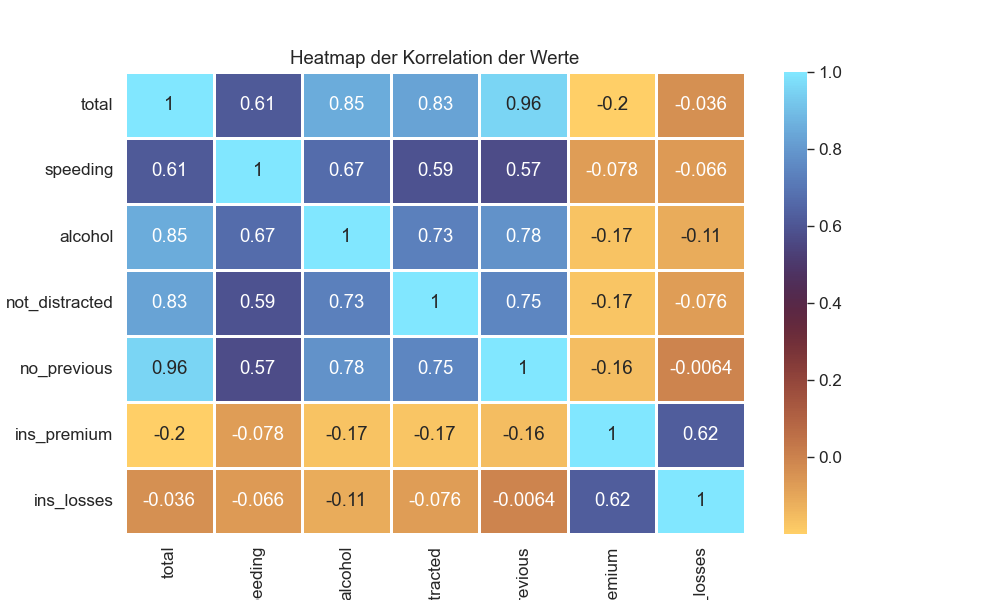

In [20]:
plt.figure(figsize=(10, 6)) # Setzt die Größe der Figur
sns.set_context('paper', font_scale=1.4) # Setzt den globalen Parameter für nachfolgende Plots die keinen eigenen Context haben alternative Parameter: paper, notebook, talk, poster

crash_mx = crash_df.select_dtypes(include=['number']).corr() # Berechnet die Korrelation der Werte

# Heatmap erstellen
sns.heatmap(crash_mx, annot=True, cmap='managua', linecolor='white', linewidth=1) # Erstellt die Heatmap
plt.title('Heatmap der Korrelation der Werte') # Setzt den Titel der Heatmap
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_163836\1621651650.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights = flights.pivot_table(index='month', columns='year', values='passengers') # Pivotiere die Daten


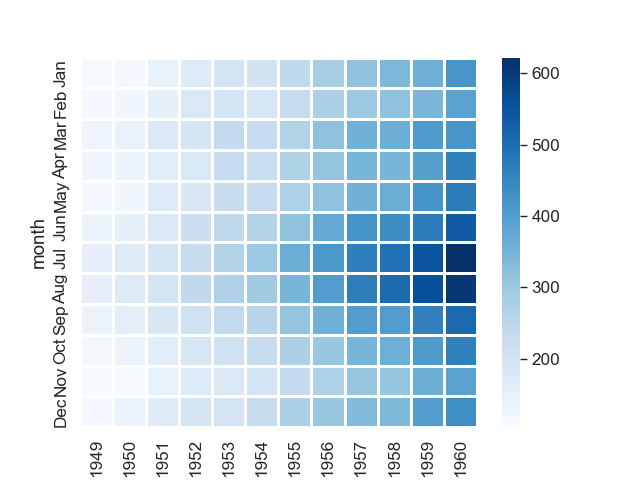

In [21]:
plt.figure() # Erstellt eine neue Figur, damit sich der Plot nicht mit vorherigen überschneidet

flights = sns.load_dataset('flights') # Lade das 'flights'-Dataset
flights = flights.pivot_table(index='month', columns='year', values='passengers') # Pivotiere die Daten

sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1) # Erstellt die Heatmap
plt.show()

### Cluster Maps in Seaborn

Ein **Cluster Map** (`sns.clustermap()`) ist eine erweiterte Form der **Heatmap**, die zusätzlich eine **hierarchische Clusteranalyse** durchführt.  
Sie ordnet Zeilen und/oder Spalten basierend auf Ähnlichkeiten neu an und stellt diese in Form von **Dendrogrammen** dar.

#### Wann sind Clustermaps nützlich?
- Erkennen von Gruppen und Mustern in großen Datensätzen.
- Visualisierung von Korrelationen oder Ähnlichkeiten zwischen Variablen.
- Untersuchung von Clusterbildung in numerischen Daten.

#### Wichtige Parameter für `sns.clustermap()`
| Parameter             | Beschreibung |
|-----------------------|-------------|
| `data`           | Die darzustellende Matrix oder der DataFrame. |
| `cmap='coolwarm'` | Definiert das Farbschema (`"Blues"`, `"viridis"`, `"magma"`, etc.). |
| `standard_scale=1` | Normalisiert die Werte innerhalb der Spalten (`0` für Zeilen, `1` für Spalten). |
| `z_score=1`       | Standardisiert die Werte (`0` für Zeilen, `1` für Spalten). |
| `method='average'` | Cluster-Methode (`'single'`, `'complete'`, `'average'`, `'ward'`, etc.). |
| `metric='euclidean'` | Distanzmetrik für das Clustering (`'euclidean'`, `'correlation'`, `'cosine'`, etc.). |
| `dendrogram_ratio=0.2` | Verhältnis der Dendrogrammhöhe zur Heatmap. |
| `row_cluster=True` | Aktiviert oder deaktiviert Clustering für Zeilen. |
| `col_cluster=True` | Aktiviert oder deaktiviert Clustering für Spalten. |
| `figsize=(10, 8)` | Setzt die Größe der Abbildung. |

#### Fazit
Cluster Maps sind besonders nützlich für **explorative Datenanalysen**, da sie automatisch Gruppenbildungen und Muster erkennen.  
Sie ermöglichen eine intuitive Visualisierung von Ähnlichkeiten und Korrelationen zwischen Variablen oder Beobachtungen.


1.15.2


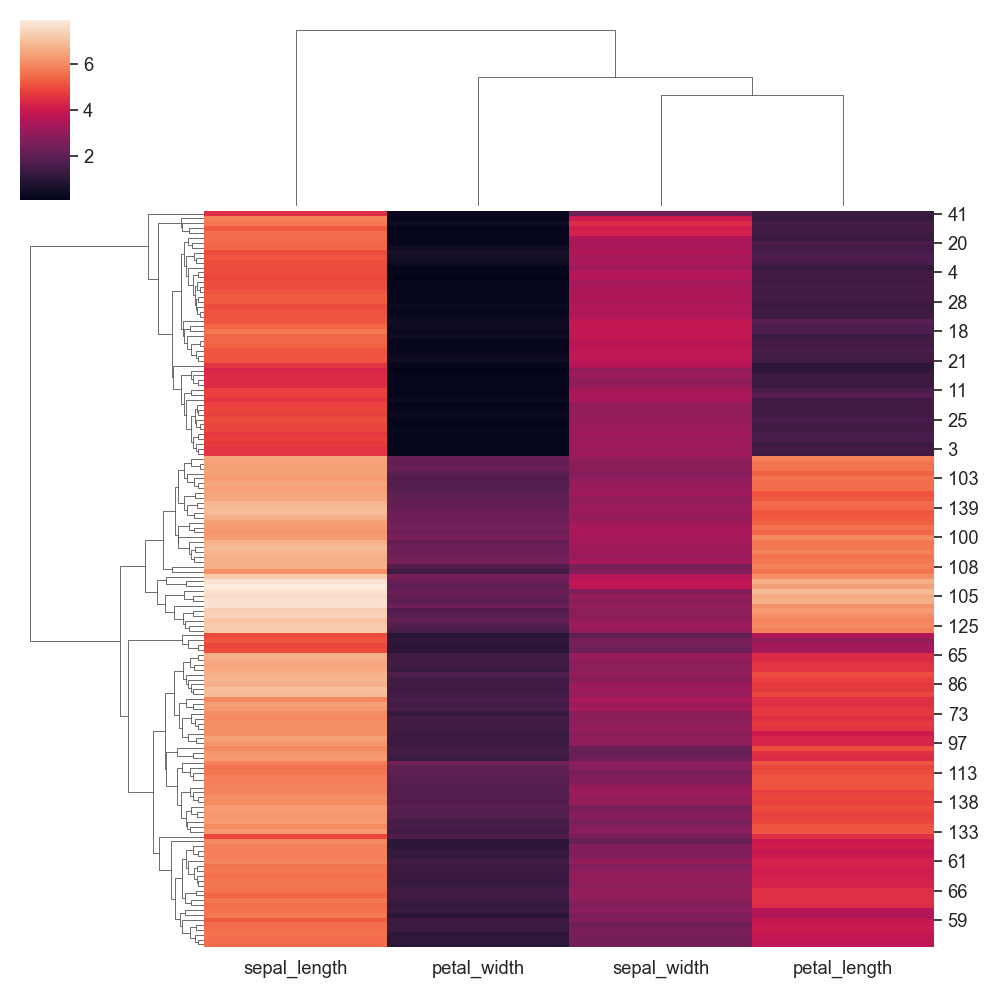

In [32]:
print(scipy.__version__)  # Sollte eine Version wie "1.x.x" ausgeben

iris = sns.load_dataset('iris') # Lade das 'iris'-Dataset

if 'species' in iris.columns: # Überprüft ob die Spalte 'species' im Dataset vorhanden ist
    species = iris.pop('species') # Entfernt die Spalte 'species' aus dem Dataset und speichert sie in der Variable 'species'
else:
        print('Die Spalte "species" existiert nicht im Dataset') # Gibt eine Fehlermeldung aus, wenn die Spalte nicht existiert

iris_numeric = iris.select_dtypes(include=['number']) # Selektiert nur numerische Werte

sns.clustermap(iris_numeric) # Erstellt den Clustermap)
plt.show()



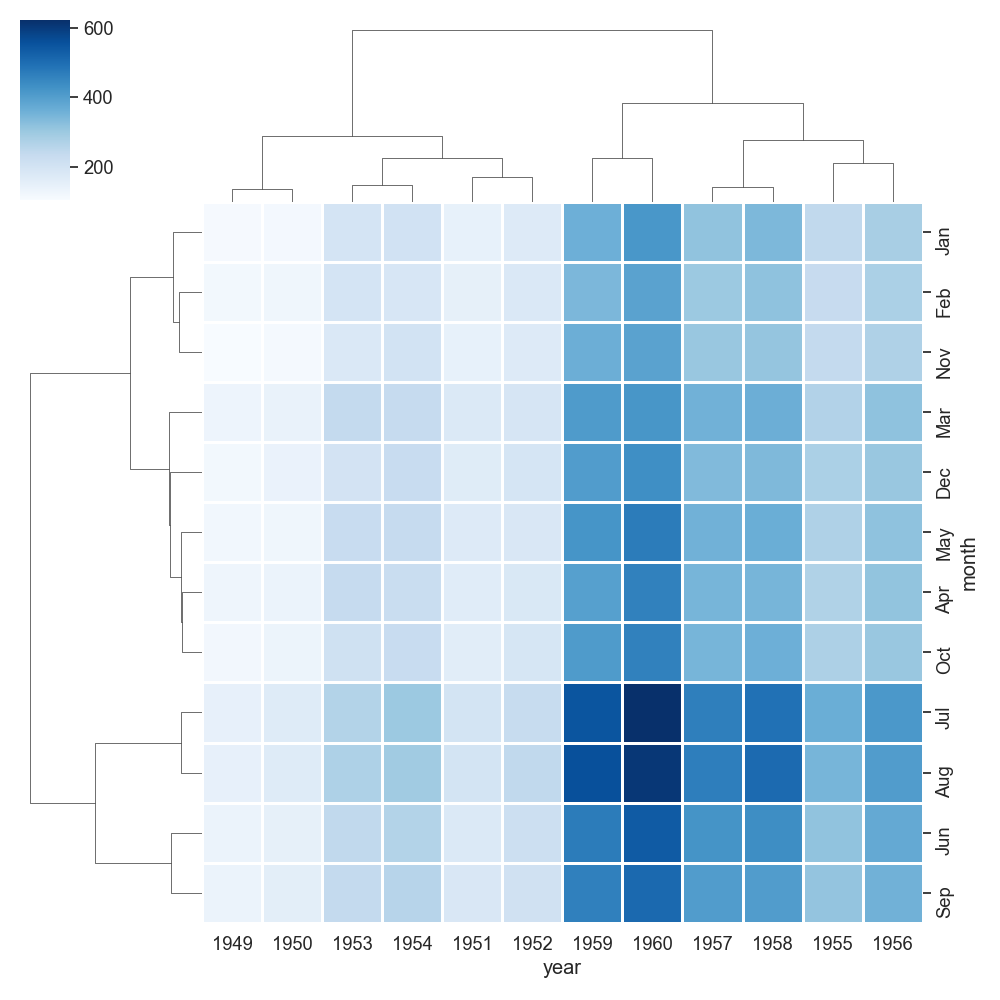

In [38]:
sns.clustermap(flights, cmap='Blues', linecolor='white', linewidth=1, standard_scale=None) # Erstellt die Clustermap. Standard_scale kann auf 0, 1 oder None gesetzt werden
# Standard_scale=0: Skaliert die Zeilen
# Standard_scale=1: Skaliert die Spalten
# Standard_scale=None: Skaliert weder Zeilen noch Spalten
# Achtung. Die Sortierung der Zeilen und Spalten kann sich ändern, wenn standard_scale gesetzt ist
plt.show()

### Pair Grids in Seaborn

Ein **Pair Grid** (`sns.PairGrid()`) ist eine erweiterte Version des **Pair Plots**, die eine **höhere Kontrolle über die einzelnen Subplots** bietet.  
Es ermöglicht die individuelle Anpassung der **Diagonalen, oberen und unteren Dreiecksmatrix**, sodass verschiedene Visualisierungstechniken in einem einzigen Plot kombiniert werden können.

#### Wann sind Pair Grids nützlich?
- **Erweiterte Visualisierung von Variablenpaaren** mit verschiedenen Plots.
- **Mehr Flexibilität als `sns.pairplot()`**, da jede Achse individuell angepasst werden kann.
- **Ermöglicht komplexe Kombinationen** von Scatterplots, Dichteplots, Regressionslinien und mehr.

#### Wichtige Parameter für `sns.PairGrid()`
| Parameter             | Beschreibung |
|-----------------------|-------------|
| `data`               | Der DataFrame mit den zu visualisierenden Daten. |
| `hue`                | Eine kategoriale Variable zur Farbgruppierung. |
| `palette`            | Die Farbpalette für verschiedene Gruppen (`hue`). |
| `corner=True`        | Zeigt nur die untere Dreiecksmatrix. |
| `height=2.5`        | Größe der einzelnen Subplots. |
| `diag_sharey=False`  | Falls `False`, haben die Diagonalplots eigene y-Achsen. |

#### Funktionen zur Anpassung der Plots in 'PairGrid':

| Funktion                  | Beschreibung |
|---------------------------|-------------|
| `.map(func)`              | Wendet eine Funktion auf **alle Subplots** an. |
| `.map_diag(func, **kwargs)` | Wendet eine Funktion auf **die Diagonale** an (z. B. `sns.histplot`, `sns.kdeplot`). |
| `.map_upper(func, **kwargs)` | Wendet eine Funktion auf **die obere Dreiecksmatrix** an (z. B. `sns.scatterplot`). |
| `.map_lower(func, **kwargs)` | Wendet eine Funktion auf **die untere Dreiecksmatrix** an (z. B. `sns.kdeplot`). |
| `.map_offdiag(func, **kwargs)` | Wendet eine Funktion auf **alle Nicht-Diagonal-Plots** an (sowohl obere als auch untere Dreiecksmatrix). |
| `.add_legend()`           | Fügt eine **Legende** hinzu, wenn `hue` verwendet wird. |
| `.set(xlim=(a, b), ylim=(c, d))` | Setzt **x- und y-Achsenbereiche** für alle Subplots. |
| `.set_titles(template="{col_name}")` | Definiert die Titel der Spalten basierend auf den Variablennamen. |
| `.set_axis_labels(x_var, y_var)` | Setzt **Achsenbeschriftungen** für das gesamte Grid. |
| `.set_xlabels(label, **kwargs)` | Setzt **x-Achsen-Labels** für alle Subplots. |
| `.set_ylabels(label, **kwargs)` | Setzt **y-Achsen-Labels** für alle Subplots. |
| `.fig.subplots_adjust(left, right, top, bottom, wspace, hspace)` | Passt **Abstände zwischen den Subplots** an. |
| `.fig.suptitle(title, **kwargs)` | Setzt einen **übergeordneten Titel** für das gesamte PairGrid. |


#### Beispiel für die Verwendung von `PairGrid`:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Lade das 'iris'-Dataset
iris = sns.load_dataset("iris")

# PairGrid erstellen
g = sns.PairGrid(iris, hue="species", palette="husl")

# Unterschiedliche Plots für verschiedene Bereiche
g.map_lower(sns.kdeplot, fill=True)  # KDE-Plots für untere Dreiecksmatrix
g.map_upper(sns.scatterplot)         # Scatterplots für obere Dreiecksmatrix
g.map_diag(sns.histplot, kde=True)   # Histogramme mit KDE-Kurve auf der Diagonale

# Legende hinzufügen
g.add_legend()

plt.show()


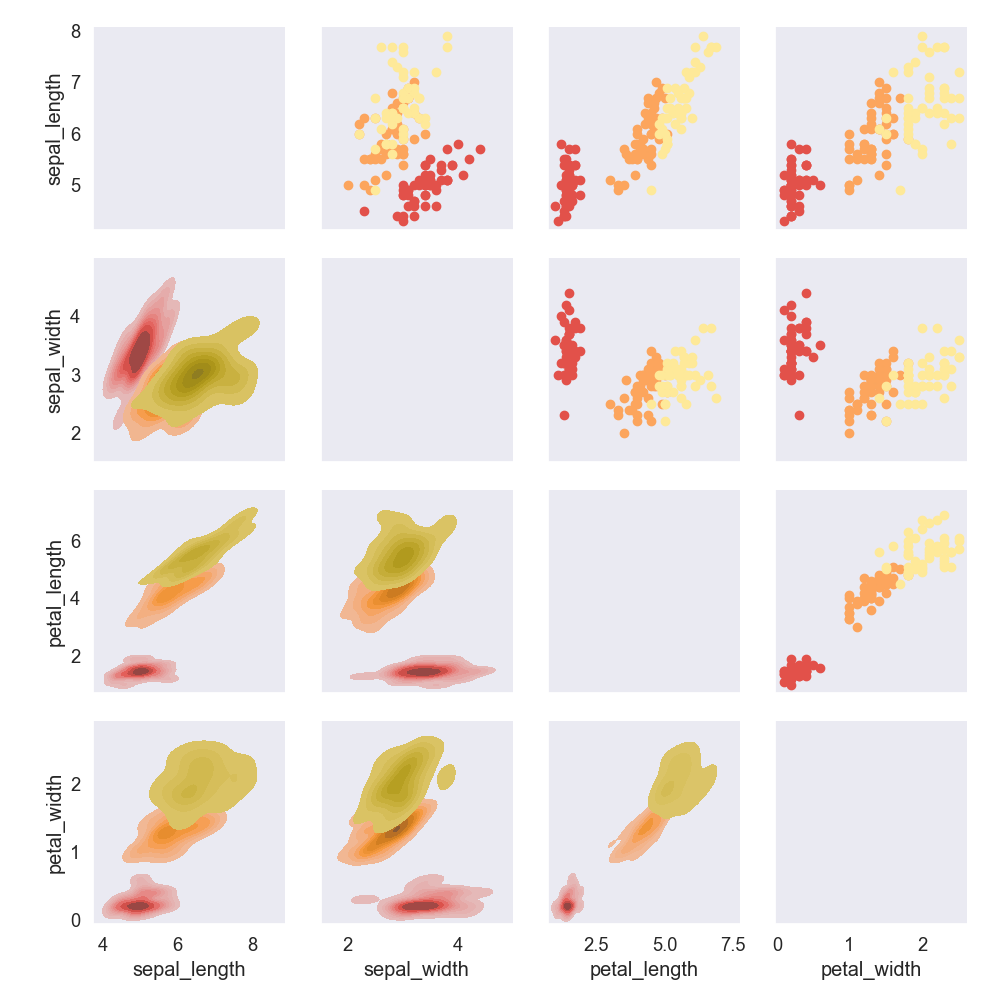

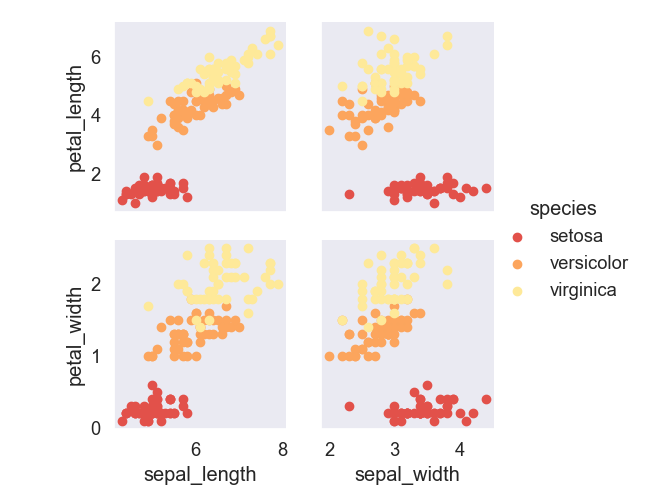

In [68]:
iris = sns.load_dataset('iris') # Lade das 'iris'-Dataset
iris_g = sns.PairGrid(iris, hue='species') # Erstellt ein PairGrid
# iris_g.map(plt.scatter) # Erstellt den Scatterplot im PairGrid mit den Daten aus dem 'iris'-Dataset und der Farbe 'species' als Hue
# iris_g.map_diag(plt.hist) # Erstellt das Histogramm auf der Diagonalen des PairGrids, was bedeutet, dass die Histogramme nur einmal gezeichnet werden
# iris_g.map_offdiag(plt.scatter) # Erstellt den Scatterplot im PairGrid mit den Daten aus dem 'iris'-Dataset und der Farbe 'species' als Hue
# iris_g.map_lower(sns.kdeplot, fill=True)  # KDE-Plots für die untere Dreiecksmatrix
# iris_g.map_upper(sns.scatterplot)         # Scatterplots für die obere Dreiecksmatrix
# iris_g.map_diag(sns.histplot, kde=True)   # Histogramme mit KDE-Kurve auf der Diagonale
iris_g.map_upper(plt.scatter) # Erstellt den Scatterplot im PairGrid im oberen Bereich
iris_g.map_lower(sns.kdeplot, fill=True) # Erstellt den KDE-Plot im PairGrid im unteren Bereich mit Füllung
iris_g = sns.PairGrid(iris, hue='species',
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])
iris_g.map(plt.scatter) # Erstellt den Scatterplot im PairGrid 
iris_g.add_legend() # Fügt eine Legende hinzu




### FacetGrid in Seaborn

Ein **FacetGrid** (`sns.FacetGrid()`) ist eine leistungsstarke Funktion in Seaborn, die es ermöglicht, **mehrdimensionale Visualisierungen** zu erstellen, indem Daten nach Kategorien unterteilt und auf mehreren Subplots (Facetten) angezeigt werden.

#### Wann ist FacetGrid nützlich?
- **Vergleich von Daten über mehrere Kategorien hinweg** (z. B. Geschlecht, Tageszeiten, Regionen).
- **Erstellung von Raster-Plots**, die Trends und Muster besser sichtbar machen.
- **Mehrdimensionale Visualisierung**, indem verschiedene Variablen in Zeilen (`row`), Spalten (`col`) oder Farben (`hue`) organisiert werden.

---

#### Wichtige Parameter für `sns.FacetGrid()`
| Parameter               | Beschreibung |
|-------------------------|-------------|
| `data`                 | Der DataFrame mit den zu visualisierenden Daten. |
| `col="category"`       | Erstellt **eine Spalte pro Kategorie**. |
| `row="category"`       | Erstellt **eine Zeile pro Kategorie**. |
| `hue="category"`       | Nutzt eine kategoriale Variable zur Farbunterscheidung. |
| `col_wrap=int`         | Begrenzung der Spaltenanzahl (z. B. für eine bessere Darstellung). |
| `margin_titles=True`   | Platziert die Spalten- und Zeilentitel außerhalb der Plots. |
| `sharex=True`          | Teilt die **x-Achse** über alle Plots. |
| `sharey=True`          | Teilt die **y-Achse** über alle Plots. |
| `despine=True`         | Entfernt die oberen und rechten Achsenlinien. |
| `dropna=True`          | Entfernt fehlende Werte (`NaN`) aus den Kategorien. |
| `height=3`            | Höhe der einzelnen Plots in Zoll. |
| `aspect=1`            | Seitenverhältnis der Plots (Breite = `height * aspect`). |
| `legend_out=True`      | Platziert die Legende außerhalb der Plots. |
| `palette="deep"`       | Bestimmt die Farbpalette für `hue`-Variablen. |
| `subplot_kws={}`       | Dictionary zur Übergabe von Einstellungen für `plt.subplots()`. |

---

#### Wichtige Methoden für `FacetGrid`
| Methode                        | Beschreibung |
|---------------------------------|-------------|
| `.map(func, *args, **kwargs)`   | Wendet eine Funktion (z. B. `sns.histplot`) auf alle Subplots an. |
| `.map_dataframe(func, *args, **kwargs)` | Wendet eine Funktion auf DataFrames an (erlaubt flexiblere `kwargs`). |
| `.facet_data()`                 | Generator, der für jede Facette die Daten zurückgibt. |
| `.add_legend()`                | Fügt eine Legende hinzu (falls `hue` verwendet wird). |
| `.set_axis_labels(x_var, y_var)` | Setzt Achsenbeschriftungen für alle Subplots. |
| `.set_titles(template="{col_name}")` | Definiert Titel für Spalten basierend auf Kategorien. |
| `.set(xlim=(a, b), ylim=(c, d))` | Setzt die x- und y-Achsenbereiche für alle Subplots. |
| `.set_xlabels(label, **kwargs)` | Setzt x-Achsen-Labels für alle Subplots. |
| `.set_ylabels(label, **kwargs)` | Setzt y-Achsen-Labels für alle Subplots. |
| `.despine(**kwargs)`            | Entfernt obere/rechte Achsenlinien für eine saubere Darstellung. |
| `.fig.subplots_adjust(...)`     | Passt die Abstände zwischen den Subplots an. |
| `.fig.suptitle("Titel")`        | Fügt einen übergeordneten Titel für die gesamte FacetGrid-Darstellung hinzu. |
| `.tight_layout()`               | Optimiert die Darstellung der Plots für eine bessere Anpassung. |
| `.set_xticklabels(rotation=45)` | Dreht die x-Achsen-Beschriftungen für bessere Lesbarkeit. |

---

#### Beispiel: Verwendung von `FacetGrid`
Hier ein Beispiel mit dem **`tips`-Datensatz**, das verschiedene Gruppen nach `time` und `sex` aufteilt:

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Lade das 'tips'-Dataset
tips = sns.load_dataset("tips")

# Erstelle ein FacetGrid mit "time" als Spalten und "sex" als Farben
g = sns.FacetGrid(tips, col="time", hue="sex", height=4, aspect=1)

# Wende eine Funktion auf alle Subplots an
g.map(sns.histplot, "total_bill", bins=15, alpha=0.6)

# Achsentitel setzen
g.set_axis_labels("Rechnungsbetrag ($)", "Anzahl")

# Titel anpassen
g.set_titles("{col_name} - Zeitabschnitt")

# Legende hinzufügen
g.add_legend()

plt.show()


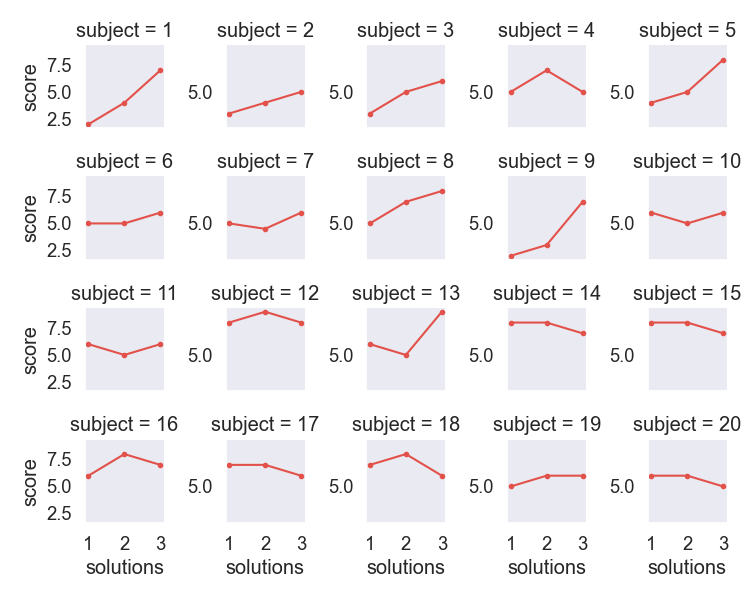

In [82]:
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
#                        col_order=['Dinner','Lunch'], palette='Set1')  # Erstellt ein FacetGrid mit den Daten aus dem 'tips'-Dataset mit hue='smoker' und col='time'
# tips_fg.map(plt.scatter, 'total_bill', 'tip', alpha=0.6)  # Erstellt den Scatterplot im FacetGrid

# ----- 

# kws = dict(s=50, linewidth=.5, edgecolor="w")  # Erstellt ein Dictionary mit den Parametern für die Punkte im Scatterplot
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
#                        hue_order=['Yes','No'], 
#                        hue_kws=dict(marker=['^','v']))  # Erstellt ein FacetGrid mit den Daten aus dem 'tips'-Dataset mit hue='smoker' und col='time'
# tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)  # Erstellt den Scatterplot im FacetGrid mit den Parametern aus dem Dictionary
# tips_fg.add_legend()  # Fügt eine Legende hinzu

# ----- 

att_df = sns.load_dataset('attention') # Lade das 'attention'-Dataset
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)  # Erstellt ein FacetGrid mit den Daten aus dem 'attention'-Dataset
att_fg.map(plt.plot, 'solutions', 'score', marker='.')  # Erstellt den Plot im FacetGrid

### Regression Plots in Seaborn

Ein **Regression Plot** ist eine Visualisierungsmethode zur Darstellung von **Zusammenhängen zwischen zwei numerischen Variablen**, ergänzt durch eine **Regressionslinie**, die eine mögliche lineare Beziehung darstellt.

Seaborn bietet zwei Hauptfunktionen für Regressionsplots:
1. `sns.regplot()` – Einzelner Scatterplot mit Regressionslinie.
2. `sns.lmplot()` – Erweiterte Version mit Unterstützung für Facetten (`row`, `col`) und Gruppen (`hue`).

#### Wann sind Regression Plots nützlich?
- Erkennen von linearen Zusammenhängen zwischen zwei Variablen.
- Visualisierung der Korrelation zwischen Features in einem Datensatz.
- Untersuchung von Trends innerhalb von Kategorien (`hue`-Gruppierung).
- Einschätzung von Ausreißern, die von der Regressionslinie abweichen.

---

#### Wichtige Parameter für `sns.regplot()`
| Parameter               | Beschreibung |
|-------------------------|-------------|
| `x, y`                 | Die beiden numerischen Variablen für den Plot. |
| `data`                 | Der DataFrame mit den Daten. |
| `ci`                   | Konfidenzintervall für die Regressionslinie (Standard: `ci=95`, `ci=None` entfernt es). |
| `scatter`              | Zeigt die Rohdatenpunkte als Scatterplot (`True` oder `False`). |
| `scatter_kws={}`       | Dictionary zur Anpassung der Scatterplot-Punkte (`{"alpha": 0.6, "color": "red"}`). |
| `line_kws={}`         | Dictionary zur Anpassung der Regressionslinie (`{"color": "black", "linewidth": 2"}`). |
| `truncate`             | Beschneidet die Regressionslinie auf den Bereich der Daten (`True` oder `False`). |
| `x_bins`              | Gruppiert die `x`-Werte in Bins für eine robustere Regression. |
| `order`               | Definiert die Ordnung der Regression (z. B. `order=2` für eine quadratische Regression). |
| `logx`                | Wendet eine logarithmische Transformation auf die `x`-Achse an (`True` oder `False`). |
| `robust`              | Nutzt eine robuste Regression (`True` oder `False`). |
| `logistic`            | Führt eine logistische Regression durch (`True` oder `False`). |
| `lowess`              | Wendet einen `LOWESS`-Smoother (lokal gewichtete Regression) an (`True` oder `False`). |
| `n_boot`              | Anzahl der Bootstrap-Samples zur Berechnung des Konfidenzintervalls. |

---

#### Wichtige Parameter für `sns.lmplot()`
| Parameter               | Beschreibung |
|-------------------------|-------------|
| `x, y`                 | Die beiden numerischen Variablen für den Plot. |
| `data`                 | Der DataFrame mit den Daten. |
| `hue="category"`       | Gruppiert die Daten farblich nach einer kategorialen Variable. |
| `col="category"`       | Erstellt eine Spalte pro Kategorie. |
| `row="category"`       | Erstellt eine Zeile pro Kategorie. |
| `height`               | Höhe jedes einzelnen Subplots (Standard: `5`). |
| `aspect`               | Seitenverhältnis der einzelnen Plots (`aspect=1` bedeutet quadratische Subplots). |
| `scatter_kws={}`       | Anpassung der Scatterplot-Punkte (`{"alpha": 0.6, "edgecolor": "black"}`). |
| `line_kws={}`         | Anpassung der Regressionslinie (`{"color": "red", "linewidth": 2"}`). |
| `markers`              | Definiert Marker für verschiedene Gruppen (`["o", "s", "D"]`). |
| `legend_out`           | Platziert die Legende außerhalb der Plots (`True` oder `False`). |
| `facet_kws={}`         | Dictionary zur Anpassung der Facetten-Darstellung (Abstände, Titel usw.). |
| `palette`              | Bestimmt die Farbpalette für `hue`-Gruppen (z. B. `"coolwarm"`, `"pastel"`). |
| `logx`                | Wendet eine logarithmische Skalierung auf die x-Achse an. |
| `truncate`             | Beschneidet die Regressionslinie auf den Bereich der Daten. |
| `ci`                   | Konfidenzintervall für die Regressionslinie (Standard: `95`). |



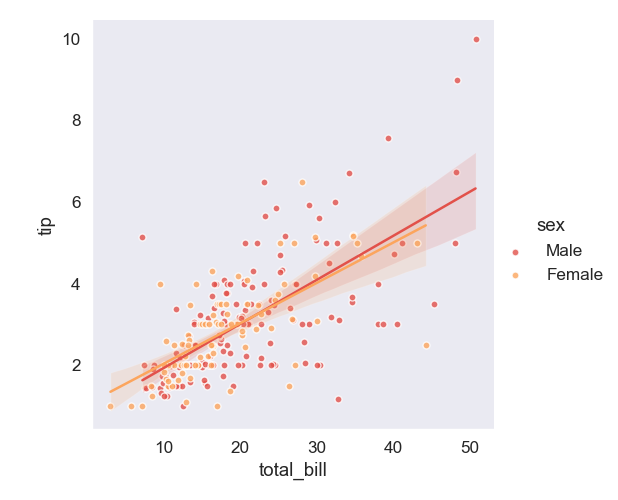

In [ ]:
# Lade das 'tips'-Dataset
tips_df = sns.load_dataset("tips")

# Setze Kontext
sns.set_context("paper", font_scale=1.4)

# Erstelle den lmplot mit korrigiertem Parameter 'linewidths' statt 'linewidth'
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips_df, markers=[".", "."],
           scatter_kws={"s": 100, "linewidths": 1, "edgecolor": "white"})  # Erstellt den lmplot

# Zeige den Plot
plt.show()


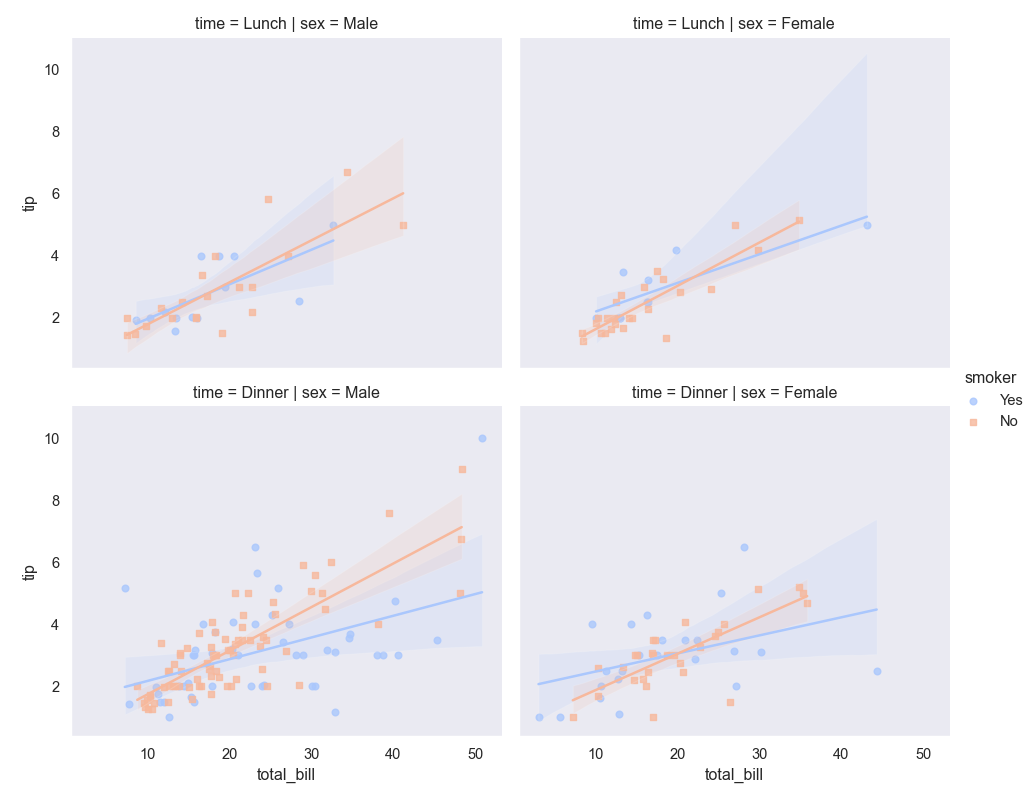

In [98]:
sns.set_context('paper', font_scale=1.2)  # Setzt den globalen Parameter für nachfolgende Plots die keinen eigenen Context haben alternative Parameter: paper, notebook, talk, poster
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', hue='smoker', data=tips_df, 
           aspect=1.2, height=4, markers=['o', 's'], palette='coolwarm')  # 'smoker' als hue hinzufügen